In [4]:
# ~ non sense to change the kernal to this directory
# import os
# os.chdir(r"C:\Users\Bryce\Desktop\MACHINE_LEARNING\BookPractice\Chapter1")
# os.getcwd()

'C:\\Users\\Bryce\\Desktop\\MACHINE_LEARNING\\BookPractice\\Chapter1'

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

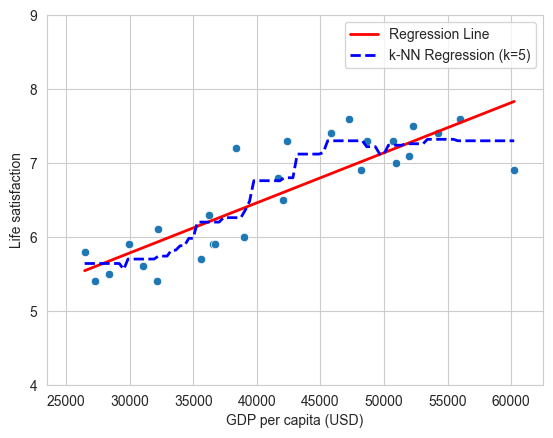

In [40]:
lifesat =  pd.read_csv("lifesat.csv")

## derive the X and Y values to plot these shytes

X =  lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values


sns.set_style("whitegrid")
sns.scatterplot(data=lifesat, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])




model =  LinearRegression()
model.fit(X, y)

# want to see how it performs with another model
# Compute number of rows (data points)
N = lifesat.shape[0] 
n_neighbors = int(np.sqrt(N))

model_knn = KNeighborsRegressor(n_neighbors=n_neighbors)
model_knn.fit(X, y)






X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

y_pred = model.predict(X_range)
#KNN model
y_pred_knn = model_knn.predict(X_range)

# Plot the regression line
plt.plot(X_range, y_pred, color='red', linewidth=2, label="Regression Line")
# KNN
plt.plot(X_range, y_pred_knn, color='blue', linestyle='dashed', linewidth=2, label=f"k-NN Regression (k={n_neighbors})")

# Set axis limits
plt.axis([23_500, 62_500, 4, 9])

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [41]:
# I want to calculate the MSE
from sklearn.metrics import mean_squared_error
y_pred_actual = model.predict(X)
y_pred_actual_KNN = model_knn.predict(X)

mse = mean_squared_error(y, y_pred_actual)
mse_KNN = mean_squared_error(y, y_pred_actual_KNN)
print(f"MSE for reg: {mse} \nMSE for kNN: {mse_KNN}")

MSE for reg: 0.15394596065527694 
MSE for kNN: 0.10509629629629622


Carrying on further... with other data sets.

In [68]:
gdp_per_capita =  pd.read_csv("gdp_per_capita.csv")

gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

# only want the year 2020
gdp_year = 2020
gdp_per_capita = gdp_per_capita[gdp_per_capita['Year'] == gdp_year]

# no longer need the years.. or code column
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)

# renaming the two columns present...
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)  # inplace=True allows me to not have to reassign the variable to it

gdp_per_capita

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297
...,...
Vanuatu,2762.791388
Vietnam,8200.331867
World,16194.040310


In [78]:
# now to fix up oecd_bli
oecd_bli = pd.read_csv("oecd_bli.csv")

# want to filter so I have only TOT inequilities
oecd_bli =  oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

# this pivot thing really cleaned things up ~~~ Good for when I have categorical data in my rows which should just be a column
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")


In [80]:
# Time to merge oecd_bli and gdp_per_capita based on country index 
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
# sort by "GDP per capita (USD)"
full_country_stats.sort_values(by=gdppc_col, inplace=True)

# only need the two columns
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [92]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) & (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

# Using only a select part of the data to train

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6
